<a href="https://colab.research.google.com/github/DivyaRoopa123/Intern-week--1/blob/main/week_3_task_1_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [59]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [60]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [61]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [62]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [63]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8666 - loss: 0.4591 - val_accuracy: 0.9700 - val_loss: 0.1064
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9677 - loss: 0.1077 - val_accuracy: 0.9683 - val_loss: 0.0976
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9807 - loss: 0.0658 - val_accuracy: 0.9747 - val_loss: 0.0805
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9760 - val_loss: 0.0821
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9871 - loss: 0.0406 - val_accuracy: 0.9800 - val_loss: 0.0781


In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.1004
Test Accuracy: 0.9749000072479248
Test Loss: 0.08892332762479782


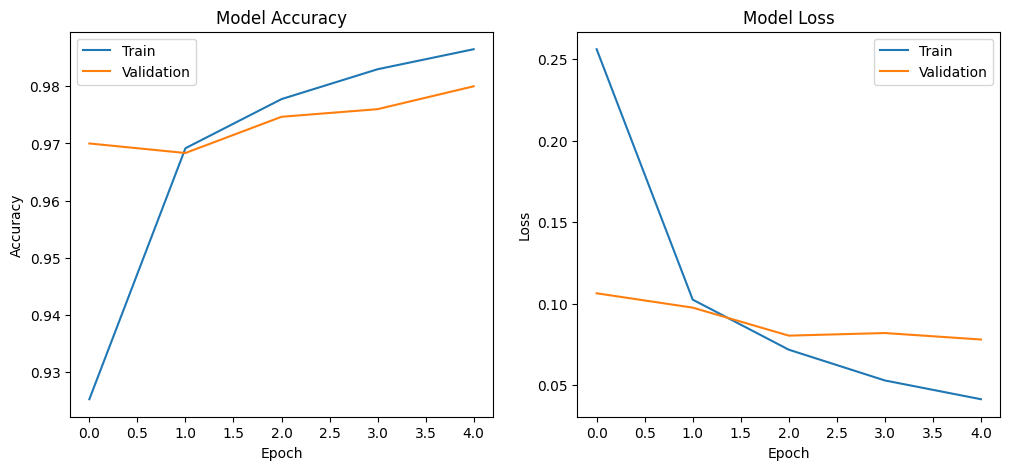

In [65]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted labels: [7 2 1 0 4 1 4 9 6 9]
Actual labels: [7 2 1 0 4 1 4 9 5 9]


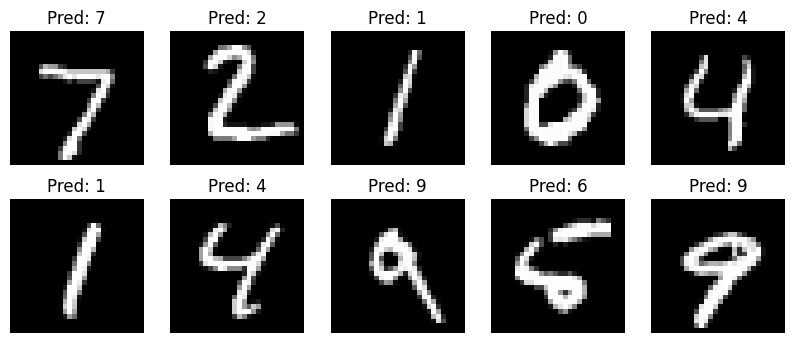

In [66]:
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_labels)
print("Actual labels:", np.argmax(y_test[:10], axis=1))

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
